(2) Clustering for Text Analysis

a) Analyzing science2k-doc-word.npy - given documents, lists features/terms

In [1]:
import numpy as np

#load numpy array as data
#1373×5476 matrix, where each row is an article described by 5476 word features
data = np.load("science2k-doc-word.npy")

In [2]:
from sklearn.cluster import KMeans

#initialize KMeans model
def initKMeans(k):
    model = KMeans(n_clusters=k, init='k-means++', random_state=3)
    model.fit(data)

    labels = model.labels_ #array specifying the label of the owning cluster for each article in data; 1373 articles so len of 1373
    centroids = model.cluster_centers_ #coordinates of the centroid(cluster center)
    return model, labels, centroids

kForDocuments = 8
model, labelsDoc, centroidsDoc = initKMeans(kForDocuments)
print('labels', labelsDoc)

labels [3 3 3 ..., 2 5 5]


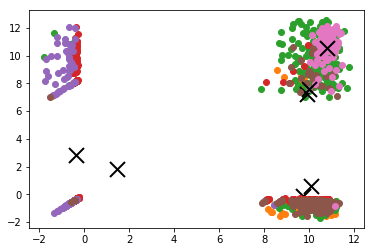

In [3]:
#Source: http://fromdatawithlove.thegovans.us/2013/05/clustering-using-scikit-learn.html
#plot the data
from matplotlib import pyplot

def plotData(k, labels, centroids, data):
    for i in range(k):
        # select only data observations with cluster label == i
        ds = data[np.where(labels==i)]
        # plot the data observations
        pyplot.plot(ds[:,0],ds[:,1],'o')
        # plot the centroids
        lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
        # make the centroid x's bigger
        pyplot.setp(lines,ms=15.0)
        pyplot.setp(lines,mew=2.0)
    pyplot.show()

plotData(kForDocuments, labelsDoc, centroidsDoc, data)

In [4]:
# Source: https://stackoverflow.com/questions/26795535/output-50-samples-closest-to-each-cluster-center-using-scikit-learn-k-means-libr

def findClosestPointsToCentroid(k, model):
    indices = []
    for idx in range(k):
        #the distance to the idx'th centroid for each point in an array data is:
        distances = model.transform(data)[:,idx] #This gives an array of len(X) distances
        #The indices of the 10 closest to centroid idx are
        ind = np.argsort(distances)[::][:10]
        indices.append(ind)
    return indices

indicesDoc = findClosestPointsToCentroid(kForDocuments, model)

In [5]:
def find10Closest(openFile, indices, variable):
    #load titles file and find titles that are closest to the centroid
    titles = open(openFile, "r")

    titlesArray = []
    #remove '\n' symbol and split by tab to obtain each title in its own index
    for line in titles:
        arr = line.strip('\n').split('\t')  
        titlesArray.append(arr)

    #transform titlesArray to numpy array
    titles_data = np.asarray(titlesArray, dtype=object, order=None)

    #print titles of closest 10 documents to a centroid
    for counter, index in enumerate(indices):
        adjustedCounter = counter + 1
        print('Closest 10', variable, 'to Centroid #', adjustedCounter, 'are:')
        print(titles_data[index])

find10Closest("science2k-titles.txt", indicesDoc, 'documents')

Closest 10 documents to Centroid # 1 are:
[[ '"Earliest Pleistocene Hominid Cranial Remains from Dmanisi, Republic of Georgia: Taxonomy, Geological Setting, and Age"']
 [ '"Age of Neoproterozoic Bilatarian Body and Trace Fossils, White Sea, Russia: Implications for Metazoan Evolution"']
 [ '"Tectonic Implications of U-Pb Zircon Ages of the Himalayan Orogenic Belt in Nepal"']
 ['"A Fossil Snake with Limbs"']
 ['"Taxonomy of the Dmanisi Crania"']
 ['"Glomalean Fungi from the Ordovician"']
 ['"Terrestrial Life: Fungal from the Start?"']
 ['"Into the Forbidden Zone"']
 ['"Oxygen Isotopes and Emerald Trade Routes since Antiquity"']
 [ '"Evidence for Ecological Causation of Sexual Dimorphism in a Hummingbird"']]
Closest 10 documents to Centroid # 2 are:
[[ '"Population Dynamical Consequences of Climate Change for a Small Temperate Songbird"']
 ['"The Formation of Chondrules at High Gas Pressures in the Solar Nebula"']
 ['"Reopening the Darkest Chapter in German Science"']
 ['"Algorithmic Gla

b) Analyzing  science2k-word-doc.npy  - given terms, lists documents

[[-6.755691   -6.755691   -6.755691   ...,  4.064107    5.093713    3.707441  ]
 [-4.028205   -4.028205   -4.028205   ..., -4.028205   -4.028205   -4.028205  ]
 [-0.03370464 -1.132184   -0.03370464 ...,  0.2539608   1.57568     0.6594092 ]
 ..., 
 [-0.1301101  -0.1301101  -0.1301101  ..., -0.1301101  -0.1301101
  -0.1301101 ]
 [-0.05128021 -0.05128021 -0.05128021 ..., -0.05128021 -0.05128021
  -0.05128021]
 [-0.06441435 -0.06441435 -0.06441435 ..., -0.06441435 -0.06441435
  -0.06441435]]


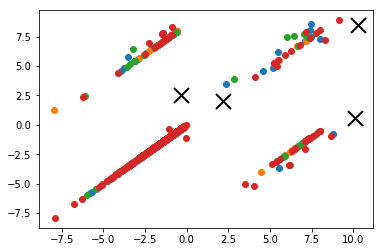

In [14]:
#load numpy array as data
#5476×1373 matrix, where each row is a term described by described by 1373 “document” features/transformed document frequencies

dataTwo = np.load("science2k-word-doc.npy")
print(dataTwo)
kForTerms = 4
modelTwo, labelsTerm, centroidsTerm = initKMeans(kForTerms)
plotData(kForTerms, labelsTerm, centroidsTerm, dataTwo)

In [13]:
indicesTerm = findClosestPointsToCentroid(kForTerms, modelTwo)
find10Closest("science2k-vocab.txt", indicesTerm, 'terms')

Closest 10 terms to Centroid # 1 are:
[['hand']
 ['exhibit']
 ['cross']
 ['expressing']
 ['class']
 ['volume']
 ['able']
 ['transgenic']
 ['clock']
 ['detect']]
Closest 10 terms to Centroid # 2 are:
[['release']
 ['expressing']
 ['volume']
 ['fig']
 ['right']
 ['mediated']
 ['cells']
 ['width']
 ['obtained']
 ['land']]
Closest 10 terms to Centroid # 3 are:
[['tail']
 ['expressing']
 ['volume']
 ['right']
 ['cross']
 ['states']
 ['described']
 ['receptor']
 ['second']
 ['trend']]
Closest 10 terms to Centroid # 4 are:
[['expressing']
 ['volume']
 ['mediated']
 ['states']
 ['described']
 ['receptor']
 ['right']
 ['fig']
 ['compass']
 ['address']]
